In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Feature Maps under Explicit Padding Handling

In [41]:
fmaps = np.load("/research/padding_fov/edge/code/fmaps_explicit.npy", allow_pickle=True)



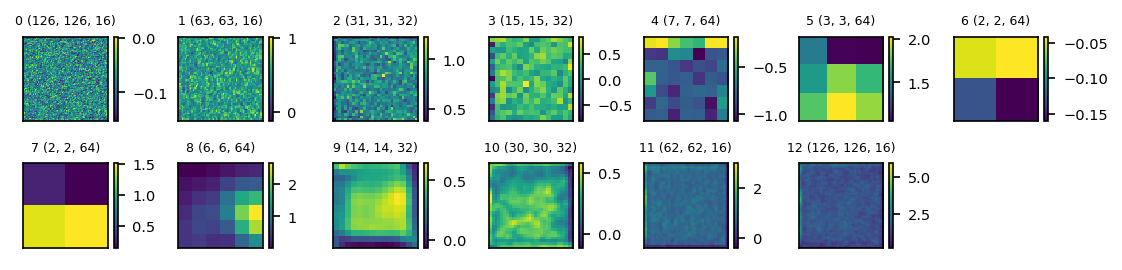

In [40]:
num_of_fmaps = len(fmaps)
fig = plt.figure(figsize=(7,3), dpi=150)
plt.subplots_adjust(left=0, bottom=0.1, right=1, top=0.85, wspace=0.3, hspace=0.5)

ind = 0
prev_size = 0
for fmap in fmaps:
    if len(fmap.shape) == 3 and (fmap.shape[0] == 2 or fmap.shape[0] != prev_size):
        prev_size = fmap.shape[0]
        avg_fmap = np.mean(fmap, axis=(2))
        ax = fig.add_subplot(int(num_of_fmaps / 7) + 1, 7, ind + 1)
        ax.set_title("{} {}".format(ind, fmap.shape), fontsize=6)
        plt.imshow(avg_fmap)
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=7) 
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ind += 1
#    else:
#        batch = batch + 1




## Feature Maps under Zero Padding

In [ ]:
fmaps = np.load("/research/padding_fov/edge/code/fmaps_zero.npy", allow_pickle=True)

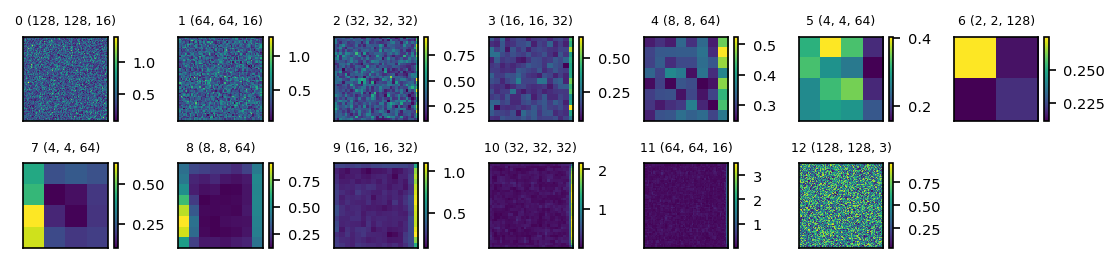

In [45]:
num_of_fmaps = len(fmaps)
fig = plt.figure(figsize=(7,3), dpi=150)
plt.subplots_adjust(left=0, bottom=0.1, right=1, top=0.85, wspace=0.3, hspace=0.5)

ind = 0
for fmap in fmaps:
    if len(fmap.shape) == 3:
        avg_fmap = np.mean(fmap, axis=(2))
        ax = fig.add_subplot(3, 7, ind + 1)
        ax.set_title("{} {}".format(ind, fmap.shape), fontsize=6)
        plt.imshow(avg_fmap)
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=7) 
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ind += 1
#    else:
#        batch = batch + 1





## Average Filters under Explicit Boundary Handling

In [ ]:
kernels_zero = np.load("/research/padding_fov/edge/code/weights.npy", allow_pickle=True)



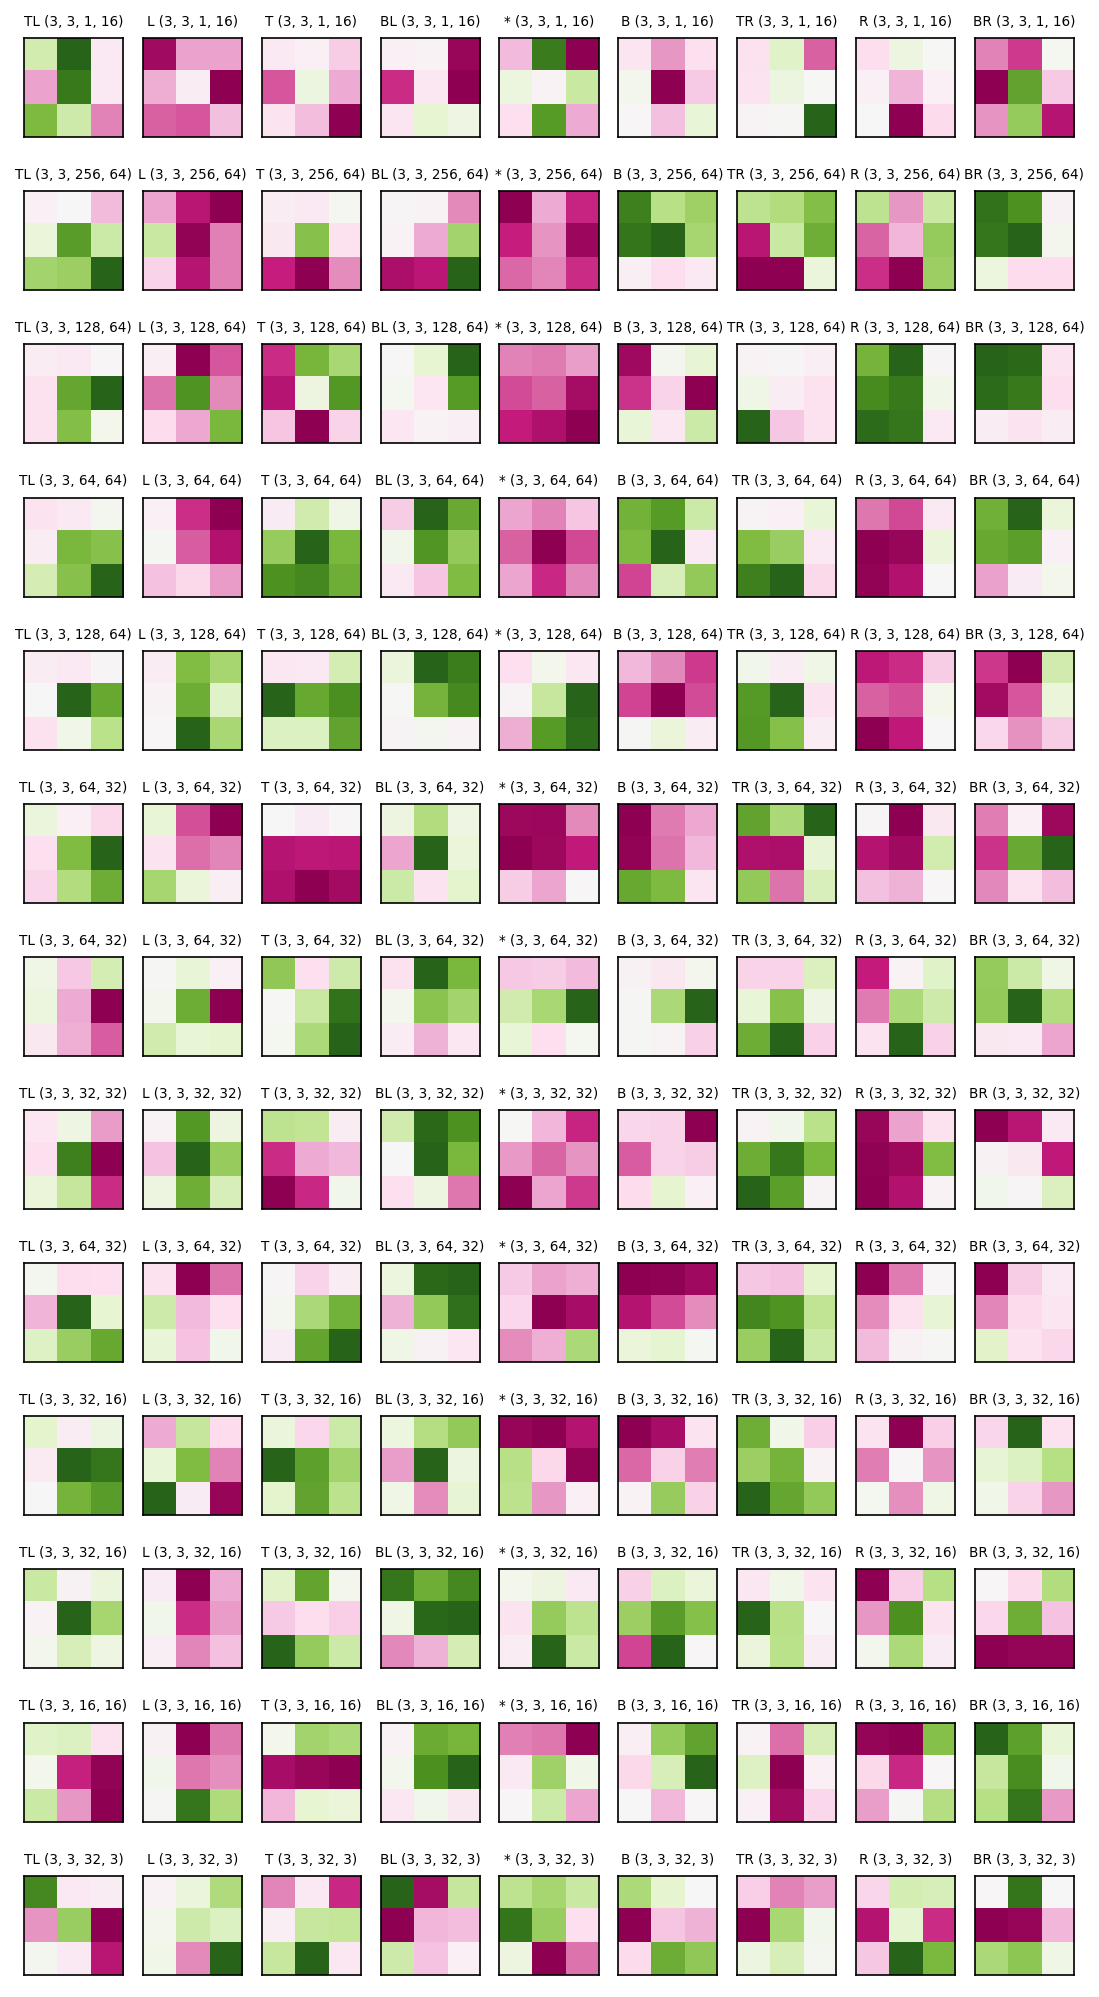

In [47]:
num_of_kernels = len(kernels)
fig = plt.figure(figsize=(7,35), dpi=150)
plt.subplots_adjust(left=0, bottom=0.1, right=1, top=0.85, wspace=0.2, hspace=0.4)
ind = 0
batch = 0
prev_batch = 0
batch_cnt = 0

captions = ['TL', 'L', 'T', 'BL', '*', 'B', 'TR', 'R', 'BR']
avg_kernel_per_batch = {}
for c in captions:
    avg_kernel_per_batch[c] = np.zeros((3, 3))

for kernel in kernels:
    if len(kernel.shape) == 4: # fc layer
        avg_kernel = np.mean(kernel, axis=(2, 3))
        if batch == 0 or batch >= 32:
            if prev_batch != batch:
                prev_batch = batch
                for i in range(batch_cnt, 9):
                    ind = ind + 1
                batch_cnt = 0
            ax = fig.add_subplot(int(num_of_kernels / 9) + 1, 9, ind + 1)
            curr_avg = avg_kernel_per_batch[captions[batch_cnt]]
            avg_kernel_per_batch[captions[batch_cnt]] = curr_avg + avg_kernel
            ax.set_title("{} {}".format(captions[batch_cnt], kernel.shape), fontsize=6.5)
            vmin = np.min(avg_kernel)
            vmax = np.max(avg_kernel)
            max_abs = max(np.abs(vmin), np.abs(vmax))

            plt.imshow(avg_kernel,vmin = -max_abs, vmax = max_abs, cmap=plt.get_cmap('PiYG'))

       #     cbar = plt.colorbar()
       #     cbar.ax.tick_params(labelsize=6) 
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            batch_cnt = batch_cnt + 1
            ind += 1
    else:
        batch = batch + 1



#### Average Boundary Filters across all Layers

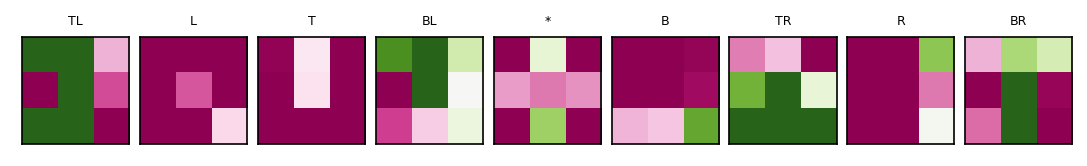

In [27]:
ind = 0
fig = plt.figure(figsize=(7,1), dpi=150)
plt.subplots_adjust(left=0, bottom=0.1, right=1, top=0.85, wspace=0.1, hspace=0.2)

for k in avg_kernel_per_batch:
            ax = fig.add_subplot(1, 9, ind + 1)
            ax.set_title("{}".format(k), fontsize=6)
            
            kernel = avg_kernel_per_batch[k]
            vmin = np.min(avg_kernel)
            vmax = np.max(avg_kernel)
            max_abs = max(np.abs(vmin), np.abs(vmax))

            plt.imshow(kernel,vmin = -max_abs, vmax = max_abs, cmap=plt.get_cmap('PiYG'))

            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            batch_cnt = batch_cnt + 1
            ind += 1




## Average Filters under Zero Padding

In [32]:
kernels_zero = np.load("/research/padding_fov/edge/code/weights_zero.npy", allow_pickle=True)


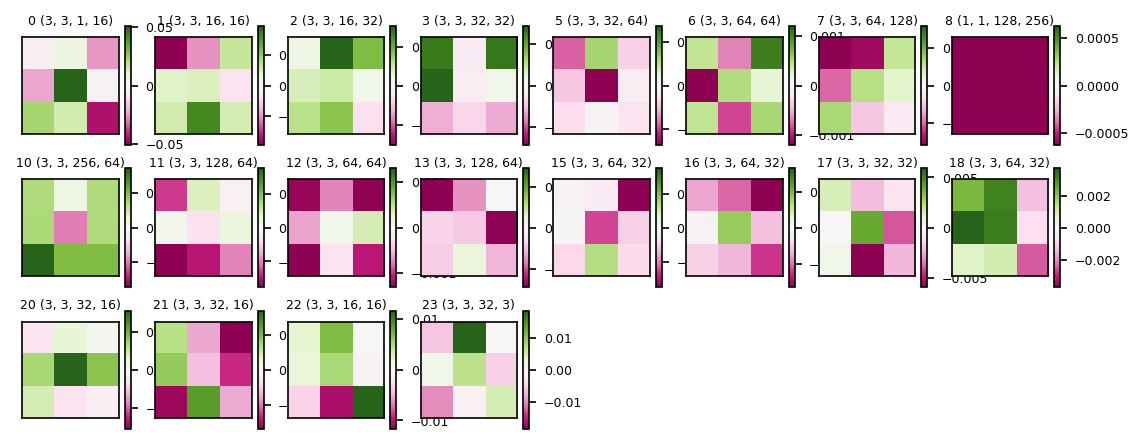

In [46]:
num_of_kernels = len(kernels_zero)
fig = plt.figure(figsize=(7,20), dpi=150)
plt.subplots_adjust(left=0, bottom=0.1, right=1, top=0.85, wspace=0.1, hspace=0.2)
ind = 0
batch = 0
for kernel in kernels_zero:
    if len(kernel.shape) == 4: # fc layer
        avg_kernel = np.mean(kernel, axis=(2, 3))
        ax = fig.add_subplot(int(num_of_kernels / 8) + 1, 8, ind + 1)
        ax.set_title("{} {}".format(int(batch / 4), kernel.shape), fontsize=6)
        vmin = np.min(avg_kernel)
        vmax = np.max(avg_kernel)
        max_abs = max(np.abs(vmin), np.abs(vmax))

        plt.imshow(avg_kernel,vmin = -max_abs, vmax = max_abs, cmap=plt.get_cmap('PiYG'))

        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=6) 
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ind += 1
    else:
        batch = batch + 1